## NLP Class Assignment 3

In [2]:
import pandas as pd

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', 500)

#### Read news data

In [36]:
news_path = 'https://storage.googleapis.com/msca-bdp-data-open/news/nlp_a_3_news.json'
news_df = pd.read_json(news_path, orient='records', lines=True)

print(f'Sample contains {news_df.shape[0]:,.0f} news articles')
news_df.head(2)

Sample contains 1,018 news articles


,url,date,language,title,text
0,https://auto.hindustantimes.com/lml-bikes/dealers/bodh-gaya,2022-01-21,en,Lml Bikes Car Dealers - Lml Bikes Showrooms in India,"Lml Bikes Car Dealers - Lml Bikes Showrooms in India Explore Friday, 21 January 2022 Log in/Sign up SearchNotificationsTop SectionsAuto NewsCar NewsBike NewsLatestAuto NewsPhotosVideosElectric VehiclesTrendingMy ReadsOffersnewFind carsFind bikesCompare carsCompare bikesEMI calculatorDealersExplore AutoAbout UsContact UsSITEMAPRSSTerms of UsePrivacy PolicyCopyright © HT Media Limited All rights reserved.HomeOffersnewFind carsFind bikesCompare carsCompare bikesEMI calculatorDealersCar NewsBik..."
1,https://auto.hindustantimes.com/pure-ev-bikes/dealers/avadi,2022-01-21,en,Pure Ev Bikes Car Dealers - Pure Ev Bikes Showrooms in India,"Pure Ev Bikes Car Dealers - Pure Ev Bikes Showrooms in India Explore Friday, 21 January 2022 Log in/Sign up SearchNotificationsTop SectionsAuto NewsCar NewsBike NewsLatestAuto NewsPhotosVideosElectric VehiclesTrendingMy ReadsOffersnewFind carsFind bikesCompare carsCompare bikesEMI calculatorDealersExplore AutoAbout UsContact UsSITEMAPRSSTerms of UsePrivacy PolicyCopyright © HT Media Limited All rights reserved.HomeOffersnewFind carsFind bikesCompare carsCompare bikesEMI calculatorDealersCar..."


#### Read Tweets data

In [4]:
tweets_path = 'https://storage.googleapis.com/msca-bdp-data-open/tweets/nlp_a_3_tweets.json'
tweets_df = pd.read_json(tweets_path, orient='records', lines=True)
print(f'Sample contains {tweets_df.shape[0]:,.0f} tweets')
tweets_df.head(2)

Sample contains 1,020 tweets


,id,lang,date,name,retweeted,text
0,1491880241782005777,en,2022-02-10,Sir Botalot dropping the Mike!,,@singervehicles Will you do a straight swap for my Renault Twingo 1.2 Extreme? \n\nThat is awesome! 🔥
1,1501237946590142469,en,2022-03-08,Sabrina Ghio,RT,"Australian GP Qualifying, Melbourne, 8th March 1997. #F1 The Grid ⬇️\n\nRow 3:\n5. Eddie Irvine (Ferrari) +2.512s\n6. Mika Hakkinen (McLaren-Mercedes) +2.602s\n\nRow 4:\n7. Johnny Herbert (Sauber-Petronas) +2.918s\n8. Jean Alesi (Benetton-Renault) +3.224s https://t.co/i4IC4LzVVN"


##### Cleaning Data

In [32]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/xnxk040/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [39]:
# Clean News text
def cleaning_news(text):
    # Missing values
    if not isinstance(text, str):
        return ""
    
    # Split words where a capital letter follows a lowercase letter ("AutoNews" -> "Auto News")
    text = re.sub(r'([a-z])([A-Z])', r'\1 \2', text)

    # Lowercasing text
    text = text.lower()
    
    # Remove punctuation
    text = re.sub(r'[^\w\s]', '', text)

    # Remove website elements and UI phrases
    text = re.sub(r'log in/sign up|terms of use|privacy policy|copyright .*? all rights reserved', '', text)

    # Remove extra spaces
    text = re.sub(r'\s+', ' ', text).strip()

    # Tokenize by splitting on spaces
    words = text.split()
 
    # Remove stopwords
    words = [word for word in words if word not in stopwords.words('english')]

    return ' '.join(words) # returning as string

In [40]:
# Apply to News Data (choosing 'text' column)
news_df['clean_text'] = news_df['text'].apply(cleaning_news)

In [41]:
news_df['clean_text'].head(2)

0    lml bikes car dealers lml bikes showrooms india explore friday 21 january 2022 log insign search notifications top sections auto news car news bike news latest auto news photos videos electric vehicles trending reads offersnew find cars find bikes compare cars compare bikes emi calculator dealers explore auto us contact us sitemaprss home offersnew find cars find bikes compare cars compare bikes emi calculator dealers car news bike news latest auto news photos videos electric vehicles trendi...
1    pure ev bikes car dealers pure ev bikes showrooms india explore friday 21 january 2022 log insign search notifications top sections auto news car news bike news latest auto news photos videos electric vehicles trending reads offersnew find cars find bikes compare cars compare bikes emi calculator dealers explore auto us contact us sitemaprss home offersnew find cars find bikes compare cars compare bikes emi calculator dealers car news bike news latest auto news photos videos electric v

In [62]:
# Cleaning Tweets text
def cleaning_tweets(text):
    if not isinstance(text, str):
        return ""
    
    # lowercasing text
    text = text.lower()

    # remove @usernames
    text = re.sub(r'@\w+', '', text)

    # remove URLs
    text = re.sub(r'http\S+', '', text)

    # remove hashtags
    text = re.sub(r'#(\w+)', r'\1', text)

    # remove newlines and extra spaces
    text = text.replace("\n", " ").strip()
    text = re.sub(r'\s+', ' ', text)

    # remove any remaining punctuation (except for periods)
    text = re.sub(r'[^\w\s.]', '', text)

    # remove periods that are not between two numbers
    text = re.sub(r'(?<!\d)\.(?!\d)', '', text)

    return text

In [63]:
# Apply to Tweets Data
tweets_df['clean_text'] = tweets_df['text'].apply(cleaning_tweets)

In [64]:
tweets_df['clean_text'].head(2)

0                                                                                                                                                     will you do a straight swap for my renault twingo 1.2 extreme that is awesome 
1    australian gp qualifying melbourne 8th march 1997. f1 the grid  row 3 5. eddie irvine ferrari 2.512s 6. mika hakkinen mclarenmercedes 2.602s row 4 7. johnny herbert sauberpetronas 2.918s 8. jean alesi benettonrenault 3.224s
Name: clean_text, dtype: object

##### Determine which news articles (news_df) are similar to each other and which tweets (tweets_df) are more similar to each other.
Create n-grams and compare the similarity of the text using Jaccard distance

In [26]:
from collections import Counter
import matplotlib.pyplot as plt
from nltk.util import ngrams
import numpy as np

In [22]:
# Generate n-grams
def generate_ngrams(text, n):
    tokens = text.split()
    if len(tokens) < n: # Skip if less than n tokens
        return []
    return [' '.join(grams) for grams in ngrams(tokens, n)]

In [28]:
# Count n-grams across dataset
def plot_ngram_distribution(df, text_column, n_values, title):
    plt.figure(figsize=(10, 5))

    total_ngrams_per_n = []
    top_10_ngram_frequencies = []

    for n in n_values:
        all_ngrams = []
        for text in df[text_column].dropna(): # remove missing values
            all_ngrams.extend(generate_ngrams(text, n))

        # Count n-gram occurrences
        ngram_counts = Counter(all_ngrams)
        total_ngrams = len(all_ngrams) # total number of n-grams
        top_10_sum = sum(count for _, count in ngram_counts.most_common(10)) # sum of top 10 n-grams

        total_ngrams_per_n.append(total_ngrams)
        top_10_ngram_frequencies.append(top_10_sum)

        print (f"n={n}, Total N-Grams: {total_ngrams}, Top 10 N-Grams Sum: {top_10_sum}")

    # Normalize values
    normalized_values = np.array(top_10_ngram_frequencies) / np.array(total_ngrams_per_n) * 100

    # Plot n-gram
    plt.bar(n_values, normalized_values, alpha=0.7)

    plt.xlabel("N-Gram Size")
    plt.ylabel("Frequency of Top 10 N-Grams")
    plt.title(title)
    plt.yscale("log")
    plt.grid(axis="y", linestyle='--', alpha=0.7)
    plt.show()

##### Visualize the selection of "n"

n=1, Total N-Grams: 1060659, Top 10 N-Grams Sum: 97331
n=2, Total N-Grams: 1059641, Top 10 N-Grams Sum: 50593
n=3, Total N-Grams: 1058623, Top 10 N-Grams Sum: 45656
n=4, Total N-Grams: 1057605, Top 10 N-Grams Sum: 39053
n=5, Total N-Grams: 1056587, Top 10 N-Grams Sum: 31919
n=6, Total N-Grams: 1055569, Top 10 N-Grams Sum: 24374
n=7, Total N-Grams: 1054551, Top 10 N-Grams Sum: 18224
n=8, Total N-Grams: 1053533, Top 10 N-Grams Sum: 14473
n=9, Total N-Grams: 1052515, Top 10 N-Grams Sum: 13149
n=10, Total N-Grams: 1051497, Top 10 N-Grams Sum: 13026


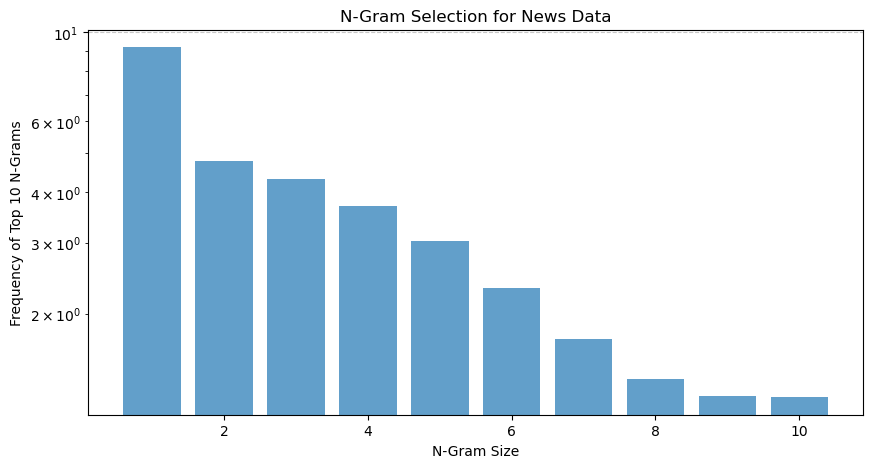

In [65]:
# Plot for news data
plot_ngram_distribution(news_df, 'clean_text', range(1, 11), "N-Gram Selection for News Data")

n=1, Total N-Grams: 25905, Top 10 N-Grams Sum: 5486
n=2, Total N-Grams: 24885, Top 10 N-Grams Sum: 765
n=3, Total N-Grams: 23866, Top 10 N-Grams Sum: 340
n=4, Total N-Grams: 22850, Top 10 N-Grams Sum: 319
n=5, Total N-Grams: 21839, Top 10 N-Grams Sum: 316
n=6, Total N-Grams: 20845, Top 10 N-Grams Sum: 314
n=7, Total N-Grams: 19863, Top 10 N-Grams Sum: 312
n=8, Total N-Grams: 18903, Top 10 N-Grams Sum: 309
n=9, Total N-Grams: 17965, Top 10 N-Grams Sum: 307
n=10, Total N-Grams: 17056, Top 10 N-Grams Sum: 305


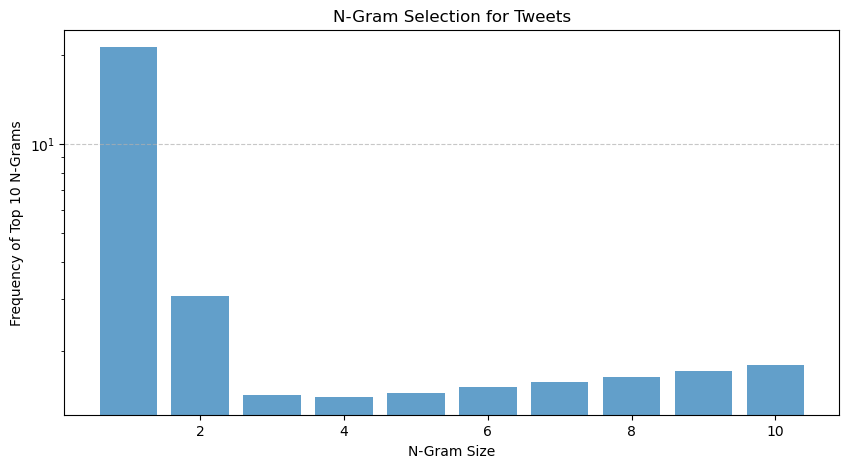

In [66]:
# Plot for tweets
plot_ngram_distribution(tweets_df, 'clean_text', range(1, 11), "N-Gram Selection for Tweets")

##### Jaccard Distance for Similarity

In [69]:
from nltk.metrics import jaccard_distance

In [103]:
# compute Jaccards similarity between two sets
def jaccard_similarity(text1, text2, n):
    ngrams1 = set(generate_ngrams(text1, n))
    ngrams2 = set(generate_ngrams(text2, n))

    if len(ngrams1 | ngrams2) == 0:  # Prevent division by zero
        return 0.0

    jaccard_score = len(ngrams1 & ngrams2) / len(ngrams1 | ngrams2)

    return round(jaccard_score, 3)  # Round to 3 decimal places

In [111]:
for i in range(5):  # Check first 5 pairs
    text1 = tweets_df.iloc[i]['clean_text']
    text2 = tweets_df.iloc[i+1]['clean_text']

    ngrams1 = set(generate_ngrams(text1, n_tweets))
    ngrams2 = set(generate_ngrams(text2, n_tweets))

    print(f"Tweet {i} n-grams:", ngrams1)
    print(f"Tweet {i+1} n-grams:", ngrams2)
    print(f"Common n-grams:", ngrams1 & ngrams2)
    print(f"Jaccard Similarity:", len(ngrams1 & ngrams2) / len(ngrams1 | ngrams2))
    print("-----")

Tweet 0 n-grams: {'my renault', 'is awesome', 'swap for', 'do a', 'for my', 'a straight', 'straight swap', 'renault twingo', 'you do', '1.2 extreme', 'that is', 'will you', 'twingo 1.2', 'extreme that'}
Tweet 1 n-grams: {'8th march', '1997. f1', '2.512s 6.', 'row 3', 'herbert sauberpetronas', 'benettonrenault 3.224s', 'sauberpetronas 2.918s', 'f1 the', '4 7.', '2.602s row', '7. johnny', 'qualifying melbourne', 'the grid', 'melbourne 8th', '8. jean', 'alesi benettonrenault', 'jean alesi', 'hakkinen mclarenmercedes', '3 5.', 'march 1997.', 'gp qualifying', 'mclarenmercedes 2.602s', '2.918s 8.', 'australian gp', 'irvine ferrari', '5. eddie', 'johnny herbert', 'grid row', 'eddie irvine', 'mika hakkinen', '6. mika', 'row 4', 'ferrari 2.512s'}
Common n-grams: set()
Jaccard Similarity: 0.0
-----
Tweet 1 n-grams: {'8th march', '1997. f1', '2.512s 6.', 'row 3', 'herbert sauberpetronas', 'benettonrenault 3.224s', 'sauberpetronas 2.918s', 'f1 the', '4 7.', '2.602s row', '7. johnny', 'qualifying m

In [113]:
# compute Jaccard similarity for Tweets
tweets_similarities = []
n_tweets = 2

for i in range(len(tweets_df)): 
    for j in range(i+1, len(tweets_df)): #avoiding redundant calcs
        similarity = jaccard_similarity(tweets_df.iloc[i]['clean_text'], tweets_df.iloc[j]['clean_text'], n=n_tweets)
       
        # print(f"Tweet {i} vs. Tweet {j} - Similarity: {similarity}")  # debugging
        
        tweets_similarities.append((i, j, similarity))

print(tweets_similarities[:10])  # Print first 10 stored values

[(0, 1, 0.0), (0, 2, 0.0), (0, 3, 0.0), (0, 4, 0.0), (0, 5, 0.0), (0, 6, 0.0), (0, 7, 0.0), (0, 8, 0.0), (0, 9, 0.0), (0, 10, 0.0)]


In [127]:
# Ensure similarity scores are floats
tweets_similarities_fixed = [(t1, t2, float(sim)) for (t1, t2, sim) in tweets_similarities]

# convert to df
tweets_sim_df = pd.DataFrame(tweets_similarities, columns=['Tweet1', 'Tweet2', 'Similarity'])
tweets_sim_df['Similarity'] = tweets_sim_df['Similarity'].astype(float)

print(tweets_sim_df['Similarity'].describe())
print(tweets_sim_df['Similarity'].value_counts())

count    519690.000000
mean          0.004689
std           0.054593
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: Similarity, dtype: float64
Similarity
0.000    480515
0.014      4512
0.013      3396
0.015      2704
0.018      2419
          ...  
0.286         1
0.357         1
0.103         1
0.371         1
0.277         1
Name: count, Length: 157, dtype: int64


In [135]:
# top most similar tweets
top10_similar_tweets = tweets_sim_df.sort_values(by='Similarity', ascending=False).head(10)
top10_similar_tweets

,Tweet1,Tweet2,Similarity
187998,205,219,1.0
124476,130,522,1.0
82300,84,275,1.0
345951,430,447,1.0
369838,472,499,1.0
369828,472,489,1.0
369822,472,483,1.0
369821,472,482,1.0
188238,205,459,1.0
272024,315,810,1.0


In [136]:
# top most dissimilar tweets
top10_dissimilar_tweets = tweets_sim_df.sort_values(by='Similarity', ascending=True).head(10)
top10_dissimilar_tweets

,Tweet1,Tweet2,Similarity
0,0,1,0.0
340589,421,422,0.0
340588,420,1019,0.0
340587,420,1018,0.0
340586,420,1017,0.0
340585,420,1016,0.0
340584,420,1015,0.0
340583,420,1014,0.0
340582,420,1013,0.0
340581,420,1012,0.0


In [129]:
# compute Jaccard similarity for News Articles
news_similarities = []
n_news = 3

for i in range(len(news_df)): 
    for j in range(i+1, len(news_df)): #avoiding redundant calcs
        similarity = jaccard_similarity(news_df.iloc[i]['clean_text'], news_df.iloc[j]['clean_text'], n=n_news)
        news_similarities.append((i, j, similarity))

# convert to df
news_sim_df = pd.DataFrame(news_similarities, columns=['Article1', 'Article2', 'Similarity'])

In [137]:
print(news_sim_df['Similarity'].describe())
print(news_sim_df['Similarity'].value_counts())

count    517653.000000
mean          0.118099
std           0.238187
min           0.000000
25%           0.000000
50%           0.000000
75%           0.073000
max           0.993000
Name: Similarity, dtype: float64
Similarity
0.000    309684
0.001     60755
0.002      8304
0.320      5433
0.323      5334
          ...  
0.647         1
0.703         1
0.602         1
0.844         1
0.751         1
Name: count, Length: 902, dtype: int64


In [133]:
# top most similar news articles
top10_similar_news = news_sim_df.sort_values(by='Similarity', ascending=False).head(10)
top10_similar_news

,Article1,Article2,Similarity
253542,290,808,0.993
331126,406,846,0.989
46106,46,406,0.989
39288,39,406,0.989
330943,406,663,0.989
39043,39,161,0.989
38065,38,161,0.989
38928,39,46,0.989
29720,29,663,0.989
455000,663,846,0.989


In [134]:
# top most dissimilar news articles
top10_dissimilar_news = news_sim_df.sort_values(by='Similarity', ascending=True).head(10)
top10_dissimilar_news

,Article1,Article2,Similarity
258826,298,312,0.0
298964,356,459,0.0
298963,356,458,0.0
298962,356,457,0.0
298961,356,456,0.0
298960,356,455,0.0
298959,356,454,0.0
298958,356,453,0.0
298956,356,451,0.0
298955,356,450,0.0


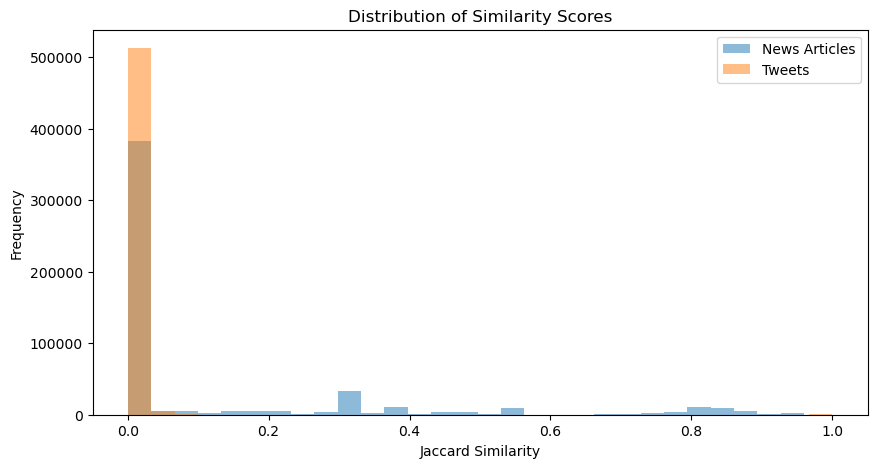

In [132]:
# Visualizing Similarity Scores
plt.figure(figsize=(10, 5))

plt.hist(news_sim_df['Similarity'], bins=30, alpha=0.5, label='News Articles')
plt.hist(tweets_sim_df['Similarity'], bins=30, alpha=0.5, label='Tweets')

plt.xlabel("Jaccard Similarity")
plt.ylabel("Frequency")
plt.title("Distribution of Similarity Scores")
plt.legend()
plt.show()

##### Which news articles/tweets were similar and which ones were dissimilar
Looking at the top 10 most similar tweets, there appear to be some either very similar tweets or some duplicates since tweet #472 appears to be an exact match as #499, #489, #483, and #482. Given the nature of twitter, these also could have been retweets with no additional text added by the user. However, looking at the plot above, we can see that by far most of thet tweets and articles are completely unique to each other. The mean of the tweets similarity distribution is only 0.054593, and 0.118099 for articles. Although many articles were dissimilar, we can see some hints of the blue bars throughout the distribution that are not completely 0 similarty.

Over all, tweets appear to be generally more dissimlar than articles. This would make sense as tweets are subject to personalization of each individual user, where as news articles typically have more repeating phrases due to things such as quotes, proper nouns, and the use of syndicated news.


##### A brief write-up explaining why and how you chose "n" for your analysis (for n-grams)
For both the news articles and the tweets, I had to normalize the plots in order to visualize the values - the counts data would not show when I initially plotted the raw data.

I chose n = 2 for the n-gram count for tweets because although there is a steep drop from the unigram to the bigrams, unigrams lack context. Trigrams and onward are too sparse. Bigrams capture the common short phrases while still avoiding sparsity.

I chose trigrams for news articles because it provides the best trade-off between frequency and meaning. Articles are longer and have structured sentences that require longer n-grams for context.

##### Was the "n" identical or different for articles vs tweets and why?
The "n" was different for articles and tweets primarily due to the length of the text and the formality of the language used (i.e., clear sentence structure vs gramatically incorrect statements). The structured and longer text of the articles require longer n-grams for things such as named entities or grammatical dependencies, where as tweets tend to be pertty informal in the writing.

##### For the news articles, please explain why you chose text or title or both text + title combined
I chose just text and not text and title combined because I wanted to utilize a large n-gram for Jaccard scoring. The title, much like tweets, have only a set number of wording so if I were to just use this, number of n-grams would have been likely the same as tweets. I also didn't use the combination of the two because I felt that any words or combination of words in the title would likely be repeated in the actual text of the article.